# Unsupervised methods

In this PW we will study unsupervised approaches. We first see how we can analyse the data through PCA projection. Then, we will see how we can obtain partition with different clustering algorithms.

Let's first import the required packages :



In [54]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, cut_tree
from sklearn.metrics import adjusted_rand_score
from scipy.cluster import hierarchy


## PCA (Principal componenet analysis)

We will again use the Boston dataset. For reacall, this dataset contains housing values in 506 suburbs of Boston.
     
- `crim`: per capita crime rate by town.

- `zn`: proportion of residential land zoned for lots over 25,000sq.ft.

- `indus`: proportion of non-retail business acres per town.

- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0     otherwise).

- `nox`: nitrogen oxides concentration (parts per 10 million).

- `rm`: average number of rooms per dwelling.

- `age`: proportion of owner-occupied units built prior to 1940.

- `dis`: weighted mean of distances to five Boston employment centres.

- `rad`: index of accessibility to radial highways.

- `tax`: full-value property-tax rate per $10,000.

- `ptratio`: pupil-teacher ratio by town.

- `lstat`: lower status of the population (percent).

- `medv`: median value of owner-occupied homes in $1000s.

In [32]:
!wget https://seafile.unistra.fr/f/eae3f87965804ff392a5/?dl=1 -O Boston.csv
boston = pd.read_csv('Boston.csv')
boston = boston.drop('Unnamed: 0', axis=1)
boston.head()

--2025-03-19 20:09:32--  https://seafile.unistra.fr/f/eae3f87965804ff392a5/?dl=1
Resolving seafile.unistra.fr (seafile.unistra.fr)... 77.72.44.41
Connecting to seafile.unistra.fr (seafile.unistra.fr)|77.72.44.41|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://seafile.unistra.fr/seafhttp/files/7df4d009-0ef6-45cd-80da-db362208cf4a/boston.csv [following]
--2025-03-19 20:09:32--  https://seafile.unistra.fr/seafhttp/files/7df4d009-0ef6-45cd-80da-db362208cf4a/boston.csv
Reusing existing connection to seafile.unistra.fr:443.
HTTP request sent, awaiting response... 200 OK
Length: 35208 (34K) [application/octet-stream]
Saving to: ‘Boston.csv’

Boston.csv          100%[===================>]  34.38K  --.-KB/s    in 0s      

2025-03-19 20:09:33 (241 MB/s) - ‘Boston.csv’ saved [35208/35208]



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


This time we will plot the mean and variance per column. You can use `.plot(kind='bar')` on the `mean()` and `var()` outputs to see the results. You can use `logy=True` parameter for variance to have a more interpretable plot.

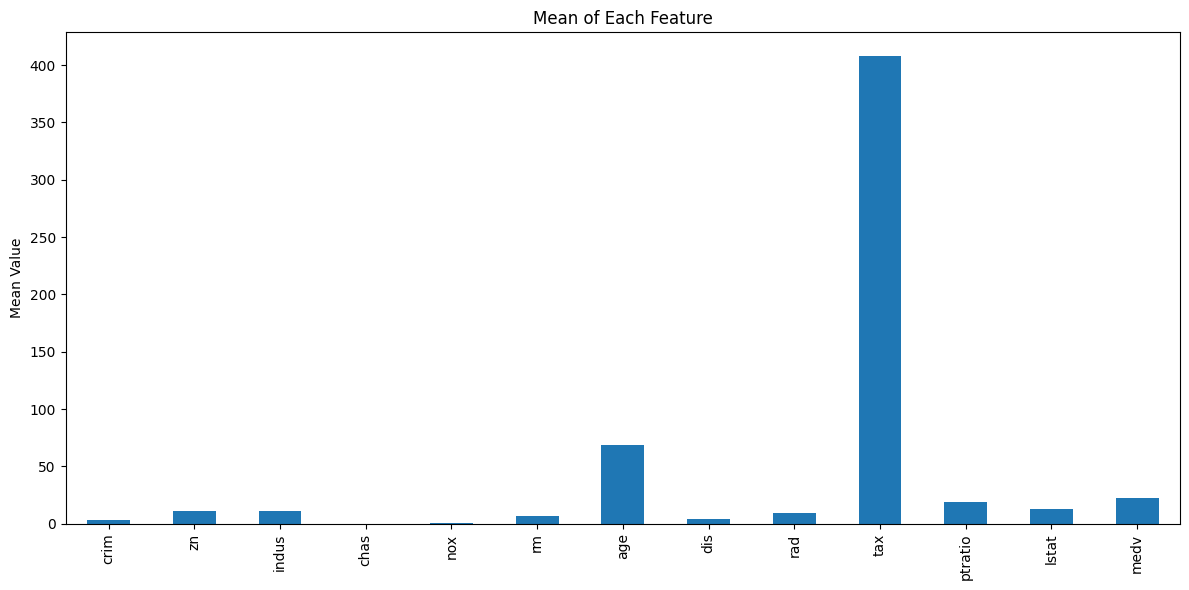

In [33]:
# Plot mean per column
plt.figure(figsize=(12, 6))
boston.mean().plot(kind='bar')
plt.title('Mean of Each Feature')
plt.ylabel('Mean Value')
plt.tight_layout()
plt.show()

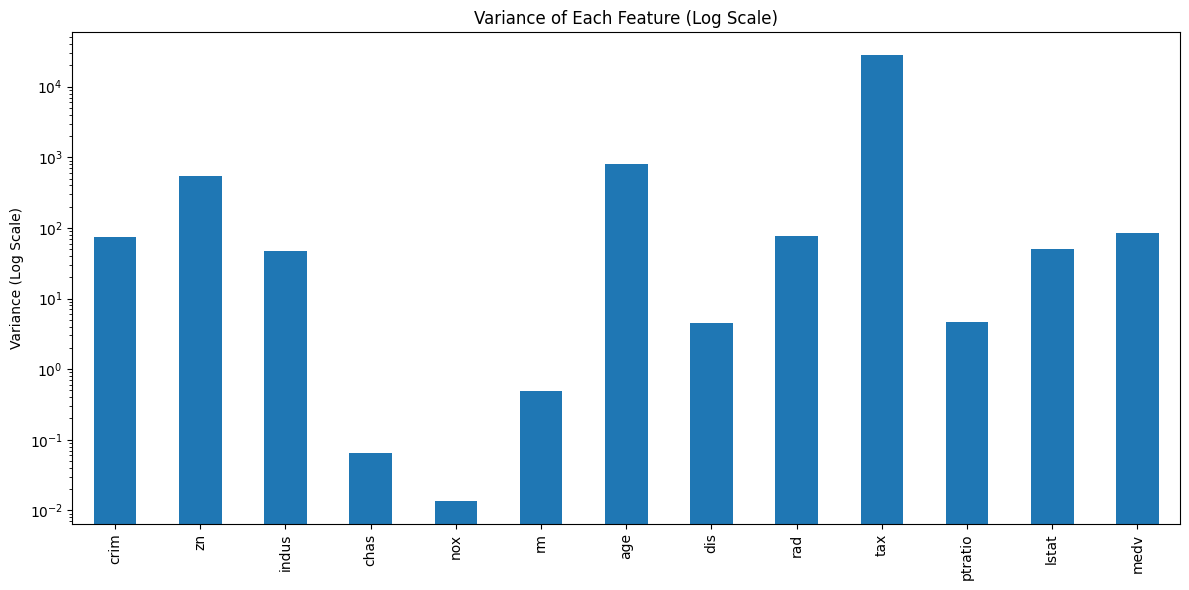

In [34]:
# Plot variance per column
plt.figure(figsize=(12, 6))
boston.var().plot(kind='bar', logy=True)
plt.title('Variance of Each Feature (Log Scale)')
plt.ylabel('Variance (Log Scale)')
plt.tight_layout()
plt.show()

You can notice that some features are clearly not on the same scale, especialy `tax`. This correspond to real values, but for an olgorithm it is equivalent of giving an extra weight on some variables.

Supervised methods are often sensible to feature scales (mostly parametric ones that use euclidean distance), this is often more important for unsupervised methods as we don't have any supervision to (re)weight each feature importance.

Hence, we will use a scaling pre-processing. This scaling can be done via the `StandardScaler()` transform imported above. It needs first to compute the actual statistics of the data, the correct it with `fit_transform()` method. All features will be centred on zero with a variance of 1. Note that this method scale both the mean and the variance but you can choose to only one on these scalings, we will do both here (default behavior).

In [35]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform it
boston_scaled = scaler.fit_transform(boston)

We will now fit a PCA transform to extract the eigenvectors from the data.

First, create a `PCA()` class and fit it to the data :

In [19]:
pcaBoston = PCA()
pcaBoston.fit(boston_scaled)


PCA()

Now, embed the `boston_scaled`  data into the PCA projection with the `.transform()` method :

In [36]:
# Project the scaled data onto the principal components
zBoston = pcaBoston.transform(boston_scaled)

PCA is mostly used as a dimension reduction method. We pick the first $p$ components of the PCA transform, with $p$ the number of dimension that you want to select. Using $p=2$ allows you to easily plot the data in 2D.

In this plot we also display the vectore of each feature, xith x its contribution to component 1 and y to component 2 (we have added a scale factor to better display the vectors)

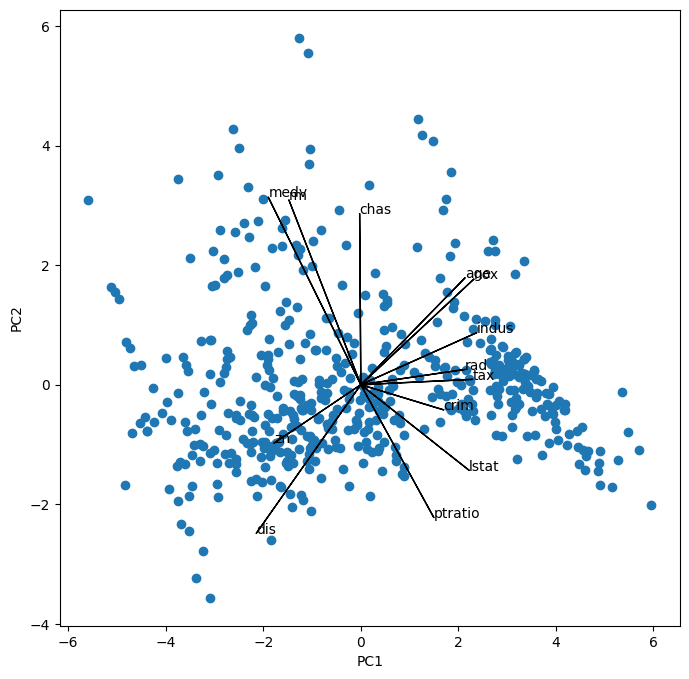

In [37]:
i, j = 0, 1 # used components
scale_factor=7
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(zBoston[:,0], zBoston[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaBoston.components_.shape[1]):
    ax.arrow(0, 0, pcaBoston.components_[i,k]*scale_factor,
             pcaBoston.components_[j,k]*scale_factor)
    ax.text(pcaBoston.components_[i,k]*scale_factor,
            pcaBoston.components_[j,k]*scale_factor,
            boston.columns[k])

You can notice that some features contibute a bit more to the components and in different directions. If they are in the sme direction, it means that they do not help much disciminating the observations.

You can plot the standard deviation of each componenent.

In [38]:

# Calculate standard deviation of each component
zBoston.std(axis=0, ddof=1)


array([2.51712486, 1.28540209, 1.12427046, 0.93943905, 0.90141922,
       0.73312631, 0.63606812, 0.5298229 , 0.51237907, 0.462457  ,
       0.42915563, 0.3667708 , 0.24620465])

You can notice that it decrease each time. It confirm that the last components contribute less to explain the difference between the observations.

To go further, the proportion of variance explained by each principal
component (PVE) is stored as `explained_variance_ratio_` in the pca object

In [39]:
pcaBoston.explained_variance_ratio_

array([0.48641508, 0.12684563, 0.09703739, 0.06775397, 0.06238083,
       0.04126246, 0.03106024, 0.02155058, 0.02015488, 0.01641876,
       0.01413927, 0.01032731, 0.00465361])

We see that the first principal component explains 48.6% of the variance in the data, the next principal component explains 12.7% of the variance, and so forth.

We can plot the proportion of variance explained (PVE) explained by each component, as well as the cumulative PVE. We first plot the `explained_variance_ratio_`, then cumulative version with `.cumsum()`:

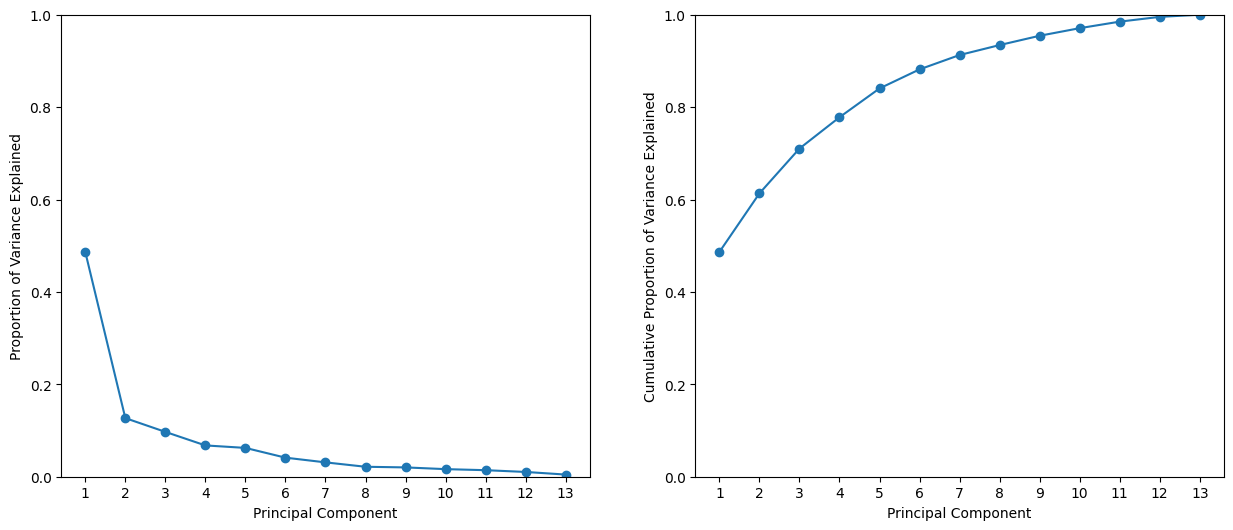

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pcaBoston.n_components_)+1
ax = axes[0]
ax.plot(ticks,
        pcaBoston.explained_variance_ratio_,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)
ax = axes[1]
ax.plot(ticks,
        pcaBoston.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)


## K-means

### Synthetic data

We will first create a simple synthetic example in which there truly are two clusters in the data, similar to SVM TP.

Create two sets of 50 points extracted from a normal distribution with `np.random.standard_normal()`, the first one centred on (0,0), and the second one on (3,-4). We will also create the labels, but we will only use them for the evaluation.

In [41]:
np.random.seed(0)

# Create first cluster: 50 points centered at (0,0)
cluster1 = np.random.standard_normal((50, 2))

# Create second cluster: 50 points centered at (3,-4)
cluster2 = np.random.standard_normal((50, 2))
cluster2 += [3, -4]  # Shift the second cluster

# Combine into one dataset
x = np.vstack([cluster1, cluster2])

# Create labels (0 for first cluster, 1 for second cluster)
y = np.zeros(100)
y[50:] = 1

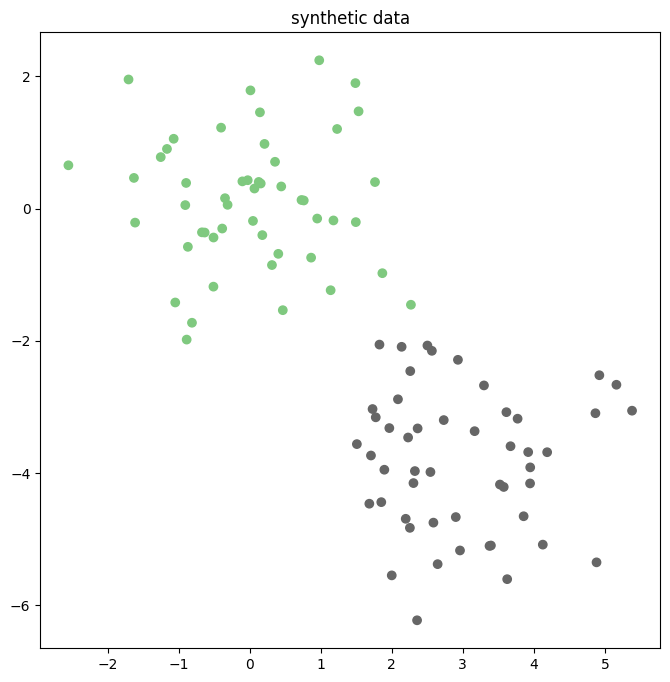

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(x[:,0], x[:,1], c=y, cmap='Accent')
ax.set_title("synthetic data");

We now perform K-means clustering with `KMeans` class.
It has different parameters, the main ones are :
* `n_clusters` : value of K
* `init` : it can be `'random'` or `'kmeans++'` (default)
* `n_init` : number of time K-means is repeated, the best based on inertia is chosen (default to auto : 1 if `init='kmeans++'`, 0 otherwise)
* `max_iter` : number maximum of iteration it it does not converge before

Let's fit a K-means with K=2, for this example keep the default parameters :

In [43]:
kmeans = KMeans(n_clusters=2, random_state=42)

You can use predict, but as K-means is not really used to do prediction, it srotres directly the clustering result in `labels_` attribute.

We will also use a metric specific to clustering when compared to labels `adjusted_rand_score()` (ARI)

In [45]:
# Get the cluster assignments
kmeans.fit(x)
cluster_labels = kmeans.labels_

# Calculate the Adjusted Rand Index
# Assuming y contains the true labels
ari = adjusted_rand_score(y, cluster_labels)
ari

0.9599960816486464

and plot it

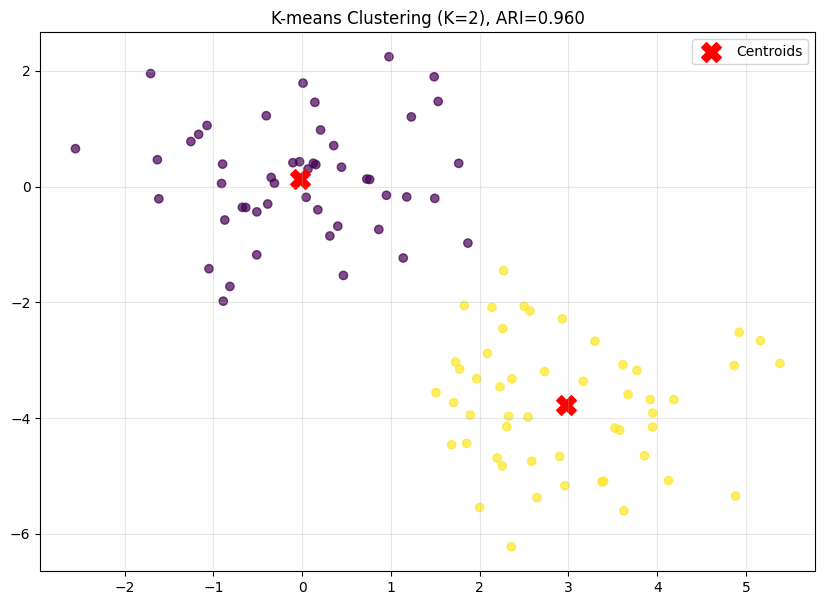

In [46]:
# Plot the original data with cluster assignments
plt.figure(figsize=(10, 7))
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title(f'K-means Clustering (K=2), ARI={ari:.3f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


We can also display the centroids of our K-means with `cluster_centers_` to evaluate if it found out our two distibution with?

In [47]:
# Display the centroids
print("Cluster centers:")
print(kmeans.cluster_centers_)

Cluster centers:
[[-0.02917238  0.13458896]
 [ 2.96732702 -3.77092142]]


In this example,   we knew that there really were two clusters because we generated the data. However, for real data, we do not know the true number of clusters, nor whether they  exist in any precise way. We could instead have performed K-means clustering on this example with K=3.

Train the new K-means, plot it and measur the ARI.

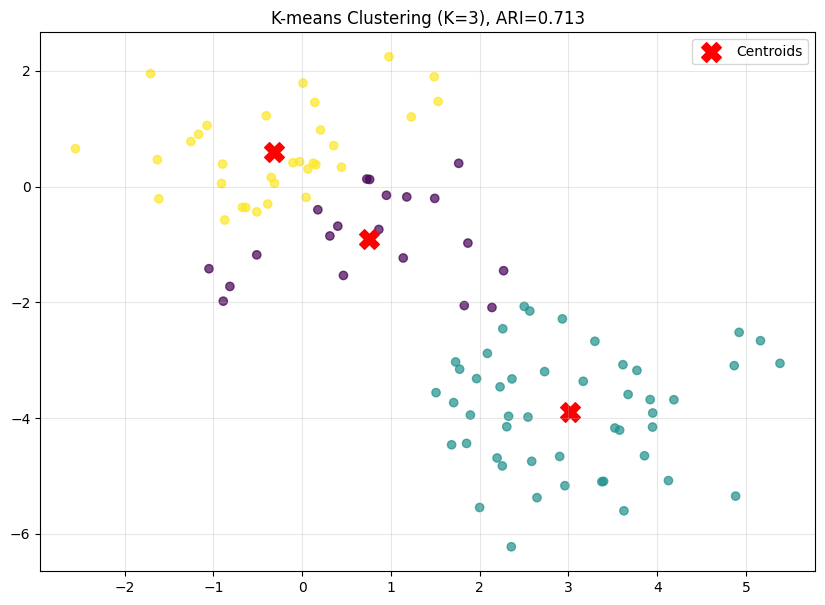

ARI for K=2: 0.960
ARI for K=3: 0.713


In [48]:
#todo
# Create and fit K-means with K=3
kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans3.fit(x)
cluster_labels3 = kmeans3.labels_

# Calculate ARI for K=3
ari3 = adjusted_rand_score(y, cluster_labels3)

# Plot the results for K=3
plt.figure(figsize=(10, 7))
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels3, cmap='viridis', alpha=0.7)

# Plot the centroids for K=3
centroids3 = kmeans3.cluster_centers_
plt.scatter(centroids3[:, 0], centroids3[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title(f'K-means Clustering (K=3), ARI={ari3:.3f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Compare ARI values
print(f"ARI for K=2: {ari:.3f}")
print(f"ARI for K=3: {ari3:.3f}")

In real cases, we cannot measure the ARI. Hence, we need to find another way to guess the number of cluster. This can be done viusally, but it is often impossible when $d$ is large, or based on expert intuition.

But we can also use intertia. For recall, for a $K$ partition $C = \{C_1, ..., C_k\}$ and $G = \{G_1, ..., G_k\}$ the set of their respective centers and $d()$ a similarity measure:
    \begin{equation*}
        I_{intra}(C,G) = \sum_{k=1}^K\frac{1}{N}\sum_{x\in C_k} d(x,G_k)
    \end{equation*}
This is already computed by `KMeans` and is stored in `inertia_`. Note that this value will decrease when the number of cluster increase (example of K=N where inertia = 0). Thus, we use the elbow method (méthode du coude), we want to select K where the inertia curve start to stabilise :
* Before the elbow: Increasing kkk significantly reduces inertia, indicating that new clusters effectively capture more of the data’s variability.
* After the elbow: Adding more clusters results in a minimal reduction in inertia, suggesting that these extra clusters may not be necessary and could lead to overfitting.


Let's train a set of K-means for K ranging from 1 to 10 and plot there inertia.

In [49]:
# Initialize an empty list to store inertia values
inertias = []

# Range of K values to test
K = range(1, 10)

# Compute K-means for each value of K
for k in K:
    # Create and fit K-means model
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(x)

    # Store the inertia value
    inertias.append(kmeans_model.inertia_)


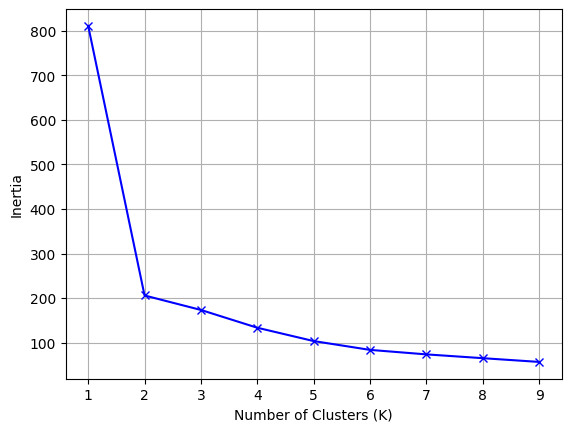

In [50]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

We can clearly that the elbow (le coude) is at K=2

## Hierarchical Agglomerative Clustering (HAC)

We will use the `AgglomerativeClustering()`  class. In the following example we use the data from the previous lab to plot the hierarchical clustering dendrogram using complete, single, and average linkage clustering with Euclidean distance as the dissimilarity measure.  

We will begin by clustering observations using complete `linkage='complete'` and `n_clusters=None`. We want to obtain the full hierarchical tree.

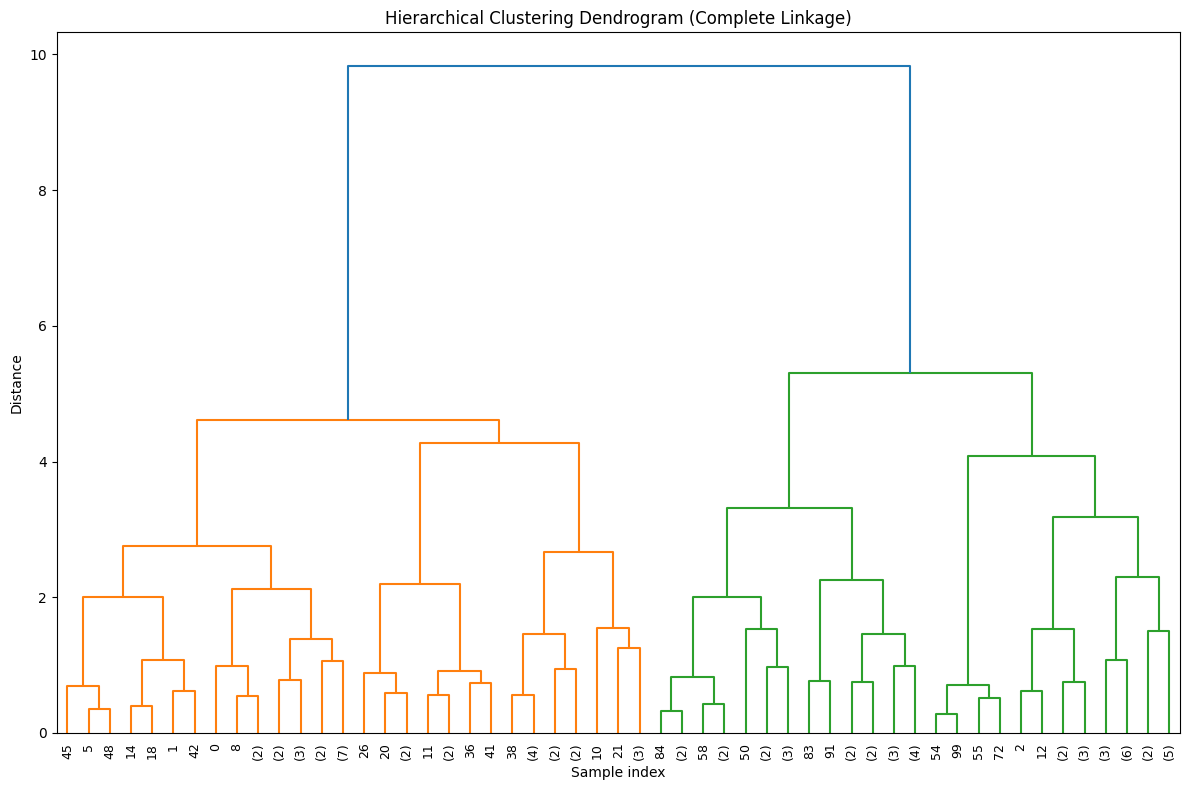

In [55]:
# Create the AgglomerativeClustering model with complete linkage
# Set distance_threshold=0 and n_clusters=None to get the full hierarchical tree
hc_comp = AgglomerativeClustering(
    n_clusters=None,
    linkage='complete',
    distance_threshold=0,
    compute_distances=True  # Required for plotting the dendrogram
)

# Fit the model to the data
hc_comp_model = hc_comp.fit(x)
# Create a dendrogram
plt.figure(figsize=(12, 8))
dn = hierarchy.dendrogram(
    hierarchy.linkage(x, method='complete'),
    leaf_font_size=9,
    truncate_mode='level',
    p=5
)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

As for K-means plot the result and compute the ARI.

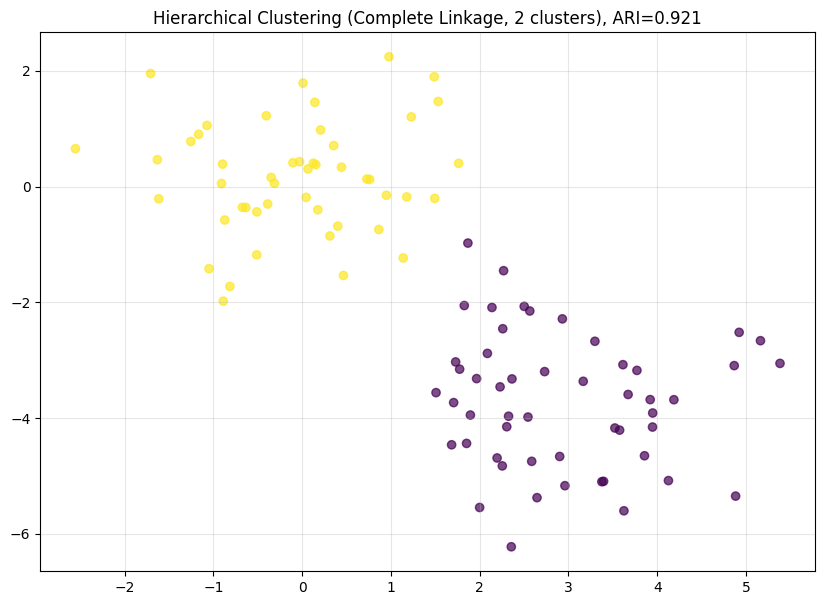

ARI for Hierarchical Clustering (Complete Linkage): 0.921


In [56]:

# For calculating ARI, we need to set a specific number of clusters
# Let's use 2 clusters as we did with K-means
hc_comp_2 = AgglomerativeClustering(n_clusters=2, linkage='complete')
hc_comp_2.fit(x)
hc_labels = hc_comp_2.labels_

# Calculate ARI
ari_hc = adjusted_rand_score(y, hc_labels)

# Plot the clustering results
plt.figure(figsize=(10, 7))
plt.scatter(x[:, 0], x[:, 1], c=hc_labels, cmap='viridis', alpha=0.7)
plt.title(f'Hierarchical Clustering (Complete Linkage, 2 clusters), ARI={ari_hc:.3f}')
plt.grid(True, alpha=0.3)
plt.show()

print(f"ARI for Hierarchical Clustering (Complete Linkage): {ari_hc:.3f}")

You should notice that it leads to poor results. This is because we don't really have a partition K, we have the raw labels, but HAC provides a hierarchy.

To visualise it, we use `dendrogram()`. However, `dendrogram()` expects a so-called *linkage-matrix representation* of the clustering, which is not provided by `AgglomerativeClustering()`. Use the function below to do that. You can take a quick look to it if you have some extra time.

In [57]:
# from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def compute_linkage_matrix(model):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    return linkage_matrix


We can now plot the dendrograms. The numbers at the bottom of the plot
identify each observation. For information, the `dendrogram()` function colors different branches of the tree that suggests a pre-defined cut of the tree at a particular depth.

We will use two parameters, `truncate_mode="level"` and `p=4`. It means that we will only display the dendogram until depth (level) 4. You can change p to display the full dataset.


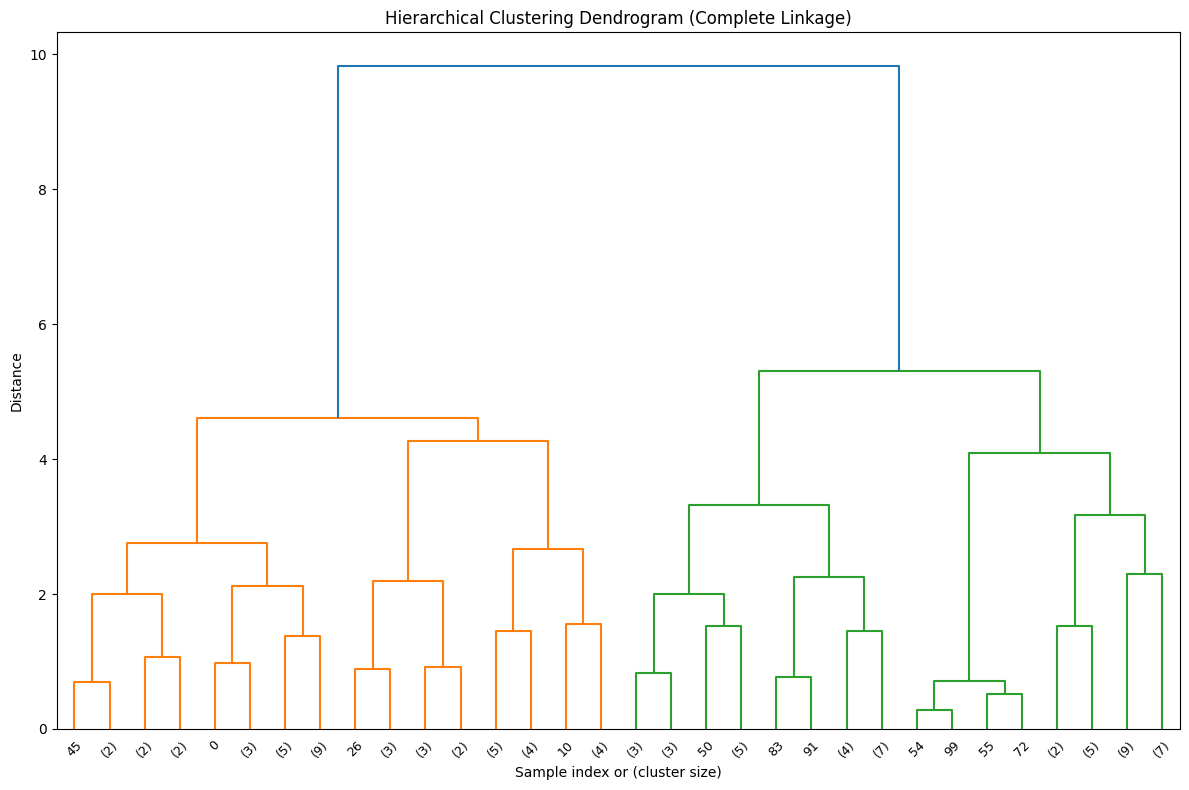

In [59]:
#todo : first compute the linkage, then display the dendogram using it
comp_linkage = compute_linkage_matrix(hc_comp)
# Plot the dendrogram with truncate_mode="level" and p=4
plt.figure(figsize=(12, 8))
dendrogram = hierarchy.dendrogram(
    comp_linkage,
    truncate_mode="level",
    p=4,
    leaf_font_size=9,
    show_leaf_counts=True,
    color_threshold=0.7*max(comp_linkage[:,2])  # This helps color branches
)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


You can notice that it suggest a cut at the last level of the dendogram (2 clusters).

To determine the cluster labels for each observation associated with a
given cut of the dendrogram, we can use the `cut_tree()` function :

In [62]:

# Cut the tree to get 2 clusters
cluster_labels = cut_tree(comp_linkage, n_clusters=2).T[0]

# Display the first few labels
print(cluster_labels[:10])


[0 0 1 0 0 0 0 0 0 0]


Plot the result and compute the ARI

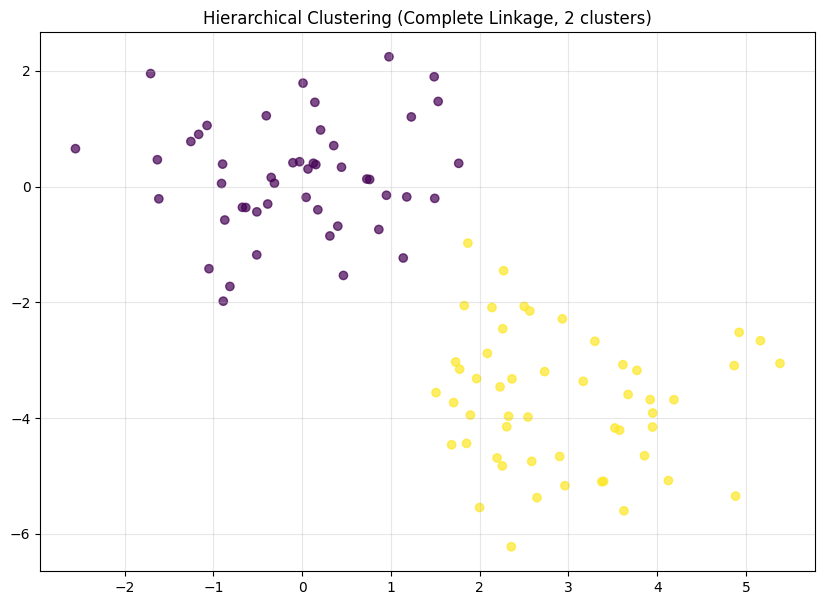

ARI for Hierarchical Clustering (cut at 2 clusters): 0.921


In [61]:
# We can also visualize these clusters
plt.figure(figsize=(10, 7))
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title('Hierarchical Clustering (Complete Linkage, 2 clusters)')
plt.grid(True, alpha=0.3)
plt.show()

# Calculate ARI for this clustering
ari_hc_cut = adjusted_rand_score(y, cluster_labels)
print(f"ARI for Hierarchical Clustering (cut at 2 clusters): {ari_hc_cut:.3f}")

This can also be achieved by providing an argument `n_clusters` to `AgglomerativeClustering()`; however each cut would require recomputing the clustering. Similarly, trees may be cut by distance threshold with an argument of `distance_threshold` to `AgglomerativeClustering()` or height to `cut_tree()`.

You can now try with `linkage='single'` and `linkage='average'`

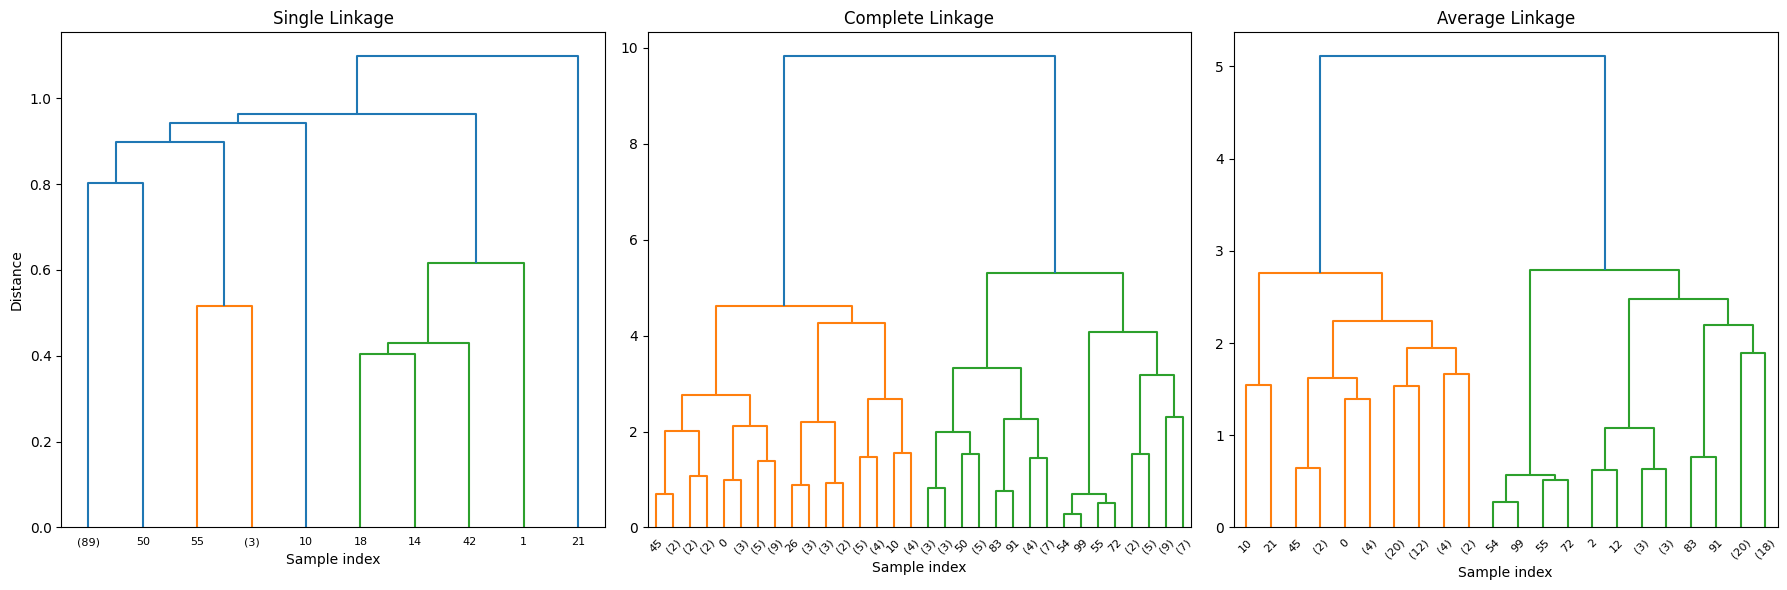

ARI for Single Linkage: 0.000
ARI for Complete Linkage: 0.921
ARI for Average Linkage: 0.921


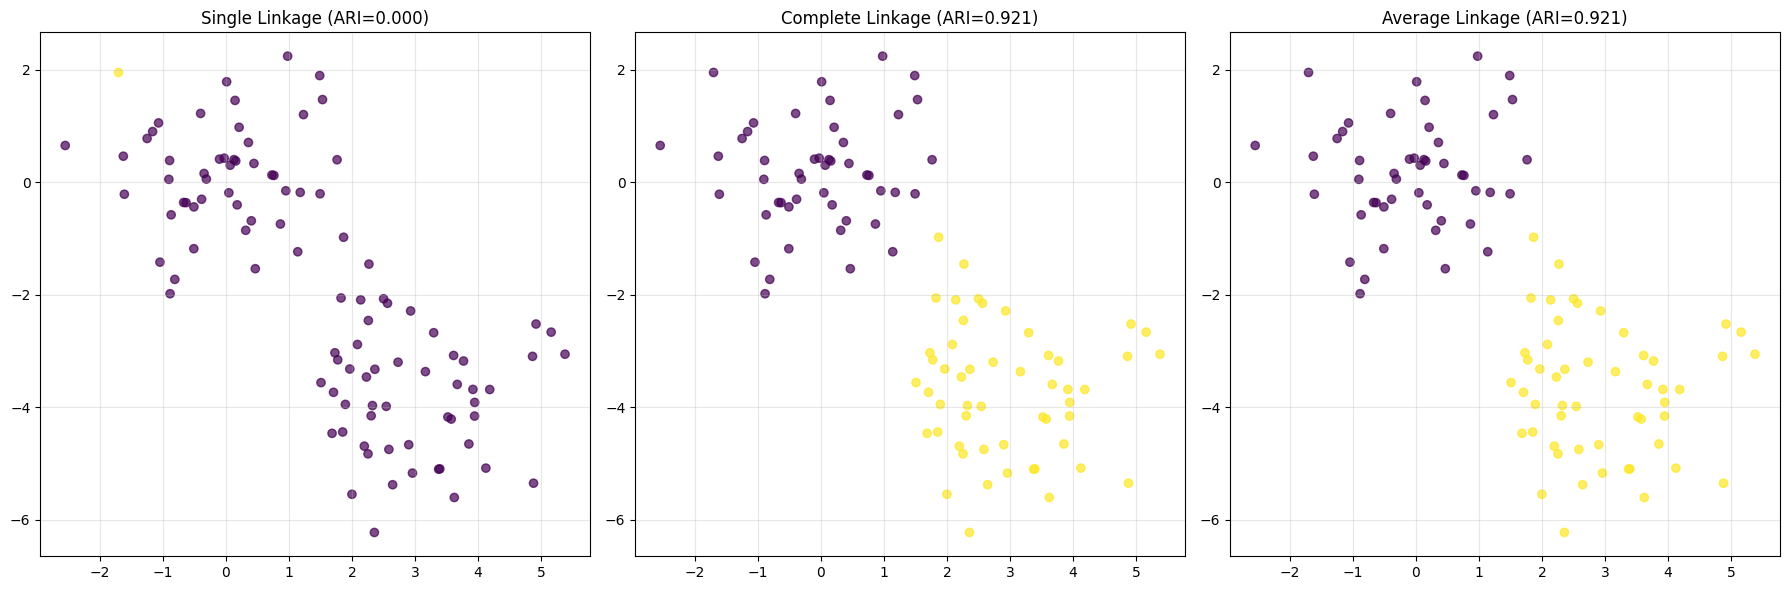

In [63]:
# Create the AgglomerativeClustering model with single linkage
hc_single = AgglomerativeClustering(
    n_clusters=None,
    linkage='single',
    distance_threshold=0,
    compute_distances=True
)

# Fit the model to the data
hc_single.fit(x)

# Compute the linkage matrix for single linkage
single_linkage = compute_linkage_matrix(hc_single)

# Create the AgglomerativeClustering model with average linkage
hc_avg = AgglomerativeClustering(
    n_clusters=None,
    linkage='average',
    distance_threshold=0,
    compute_distances=True
)

# Fit the model to the data
hc_avg.fit(x)

# Compute the linkage matrix for average linkage
avg_linkage = compute_linkage_matrix(hc_avg)

# Plot dendrograms for all three linkage methods
plt.figure(figsize=(18, 6))

# Single linkage
plt.subplot(1, 3, 1)
hierarchy.dendrogram(
    single_linkage,
    truncate_mode="level",
    p=4,
    leaf_font_size=8,
    color_threshold=0.7*max(single_linkage[:,2])
)
plt.title('Single Linkage')
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Complete linkage (already computed)
plt.subplot(1, 3, 2)
hierarchy.dendrogram(
    comp_linkage,
    truncate_mode="level",
    p=4,
    leaf_font_size=8,
    color_threshold=0.7*max(comp_linkage[:,2])
)
plt.title('Complete Linkage')
plt.xlabel('Sample index')

# Average linkage
plt.subplot(1, 3, 3)
hierarchy.dendrogram(
    avg_linkage,
    truncate_mode="level",
    p=4,
    leaf_font_size=8,
    color_threshold=0.7*max(avg_linkage[:,2])
)
plt.title('Average Linkage')
plt.xlabel('Sample index')

plt.tight_layout()
plt.show()

# Cut each tree to get 2 clusters and calculate ARI
single_labels = cut_tree(single_linkage, n_clusters=2).T[0]
avg_labels = cut_tree(avg_linkage, n_clusters=2).T[0]

# Calculate ARI scores
ari_single = adjusted_rand_score(y, single_labels)
ari_avg = adjusted_rand_score(y, avg_labels)

print(f"ARI for Single Linkage: {ari_single:.3f}")
print(f"ARI for Complete Linkage: {ari_hc_cut:.3f}")  # Using the variable from previous code
print(f"ARI for Average Linkage: {ari_avg:.3f}")

# Visualize the clusters for each linkage method
plt.figure(figsize=(18, 6))

# Single linkage
plt.subplot(1, 3, 1)
plt.scatter(x[:, 0], x[:, 1], c=single_labels, cmap='viridis', alpha=0.7)
plt.title(f'Single Linkage (ARI={ari_single:.3f})')
plt.grid(True, alpha=0.3)

# Complete linkage
plt.subplot(1, 3, 2)
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title(f'Complete Linkage (ARI={ari_hc_cut:.3f})')
plt.grid(True, alpha=0.3)

# Average linkage
plt.subplot(1, 3, 3)
plt.scatter(x[:, 0], x[:, 1], c=avg_labels, cmap='viridis', alpha=0.7)
plt.title(f'Average Linkage (ARI={ari_avg:.3f})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Application to Boston dataset

Now apply KMeans and HAC to the boston dataset.

You can try these two method on the raw or scaled data. To display your result use the two first PCA components.

Also use `cluster_centers_` to understand the result found by K-means, for HAC you need to compute the mean of the clusters to find the patterns.

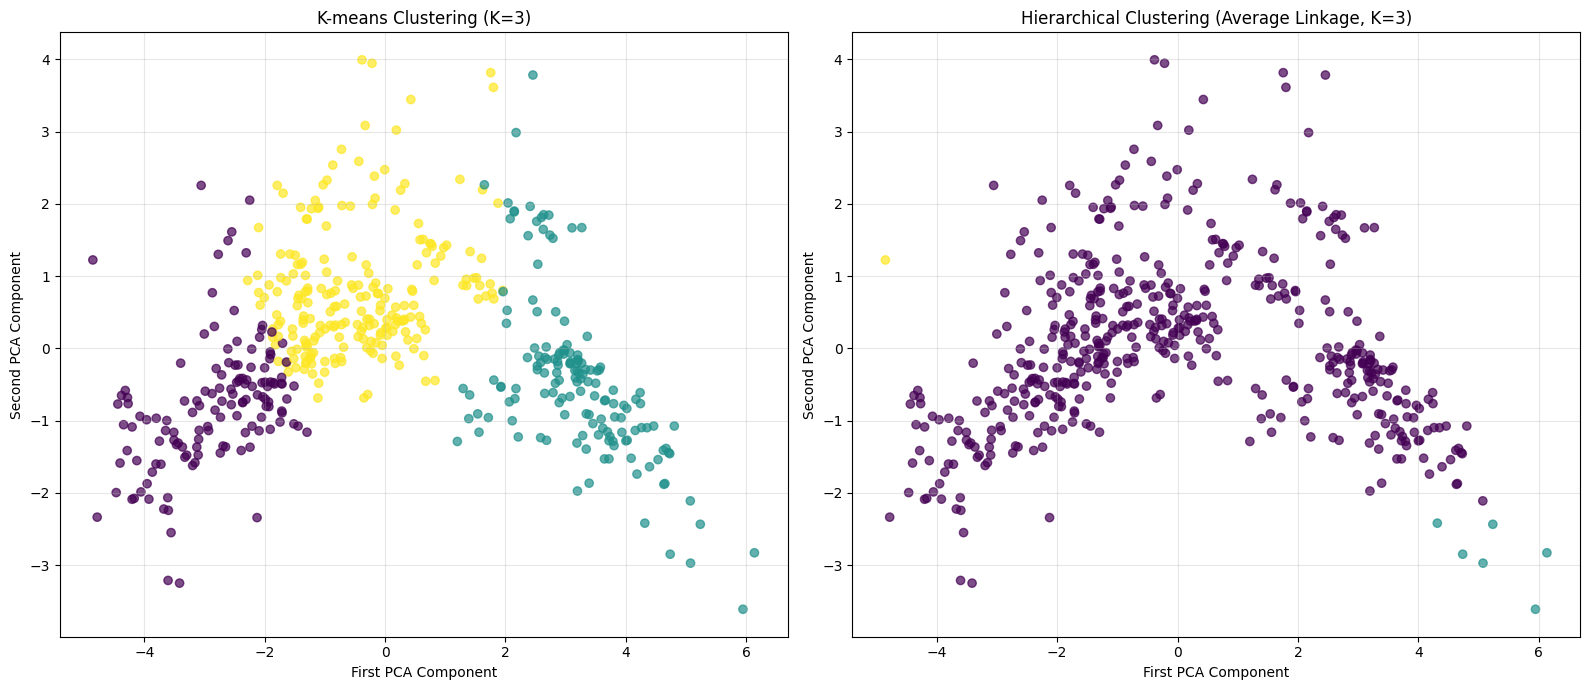

K-means Cluster Centers:
Cluster 0:
  CRIM: 0.09
  ZN: 38.61
  INDUS: 4.58
  CHAS: 0.04
  NOX: 0.43
  RM: 6.61
  AGE: 33.27
  DIS: 6.46
  RAD: 4.33
  TAX: 299.46
  PTRATIO: 17.40
  B: 389.17
  LSTAT: 6.76

Cluster 1:
  CRIM: 11.38
  ZN: 0.00
  INDUS: 18.60
  CHAS: 0.07
  NOX: 0.68
  RM: 5.96
  AGE: 90.56
  DIS: 2.01
  RAD: 21.56
  TAX: 643.78
  PTRATIO: 19.82
  B: 291.34
  LSTAT: 19.12

Cluster 2:
  CRIM: 0.45
  ZN: 2.28
  INDUS: 10.06
  CHAS: 0.09
  NOX: 0.54
  RM: 6.31
  AGE: 75.34
  DIS: 3.37
  RAD: 4.51
  TAX: 313.38
  PTRATIO: 18.17
  B: 381.54
  LSTAT: 11.85

HAC Cluster Centers:
Cluster 0:
  CRIM: 2.93
  ZN: 11.34
  INDUS: 11.07
  CHAS: 0.07
  NOX: 0.55
  RM: 6.29
  AGE: 68.34
  DIS: 3.82
  RAD: 9.39
  TAX: 405.56
  PTRATIO: 18.44
  B: 359.07
  LSTAT: 12.58

Cluster 1:
  CRIM: 60.83
  ZN: 0.00
  INDUS: 18.10
  CHAS: 0.00
  NOX: 0.67
  RM: 5.85
  AGE: 95.10
  DIS: 1.60
  RAD: 24.00
  TAX: 666.00
  PTRATIO: 20.20
  B: 151.34
  LSTAT: 20.40

Cluster 2:
  CRIM: 0.02
  ZN: 90.00
  IN

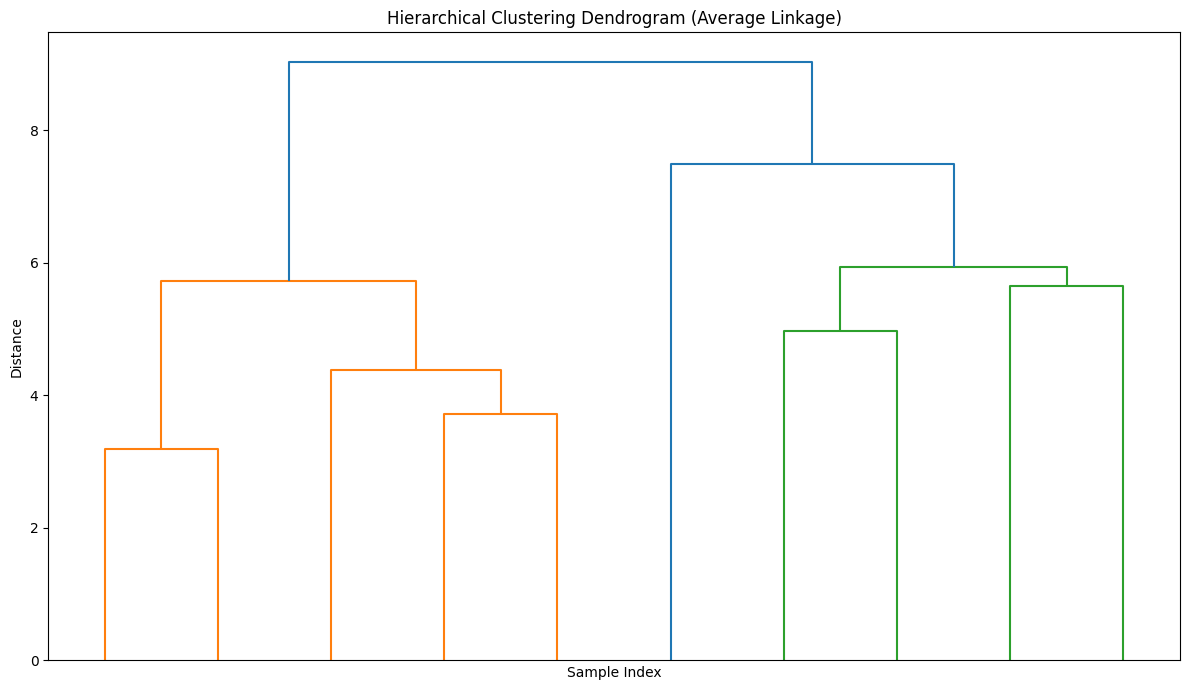

K-means cluster sizes: [np.int64(136), np.int64(151), np.int64(219)]
HAC cluster sizes: [np.int64(499), np.int64(6), np.int64(1)]


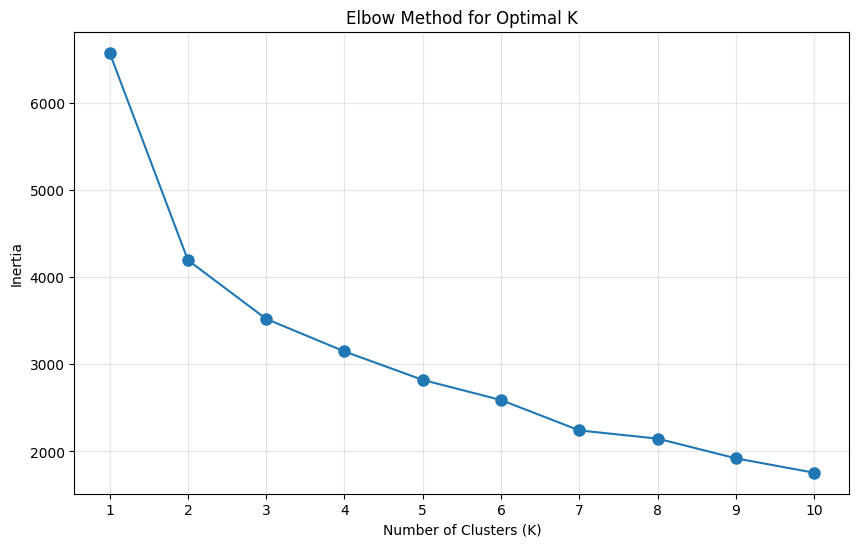

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.datasets import fetch_openml

# Load the Boston dataset using fetch_openml
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data.values
feature_names = boston.feature_names  # Already a list, no need for .tolist()

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-means (K=3 as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Apply HAC with average linkage
hac = AgglomerativeClustering(n_clusters=3, linkage='average')
hac_labels = hac.fit_predict(X_scaled)

# Visualize the clustering results
plt.figure(figsize=(16, 7))

# K-means
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.title('K-means Clustering (K=3)')
plt.xlabel('First PCA Component')
plt.ylabel('Second PCA Component')
plt.grid(True, alpha=0.3)

# HAC
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hac_labels, cmap='viridis', alpha=0.7)
plt.title('Hierarchical Clustering (Average Linkage, K=3)')
plt.xlabel('First PCA Component')
plt.ylabel('Second PCA Component')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyze K-means cluster centers
kmeans_centers_scaled = kmeans.cluster_centers_
kmeans_centers = scaler.inverse_transform(kmeans_centers_scaled)

print("K-means Cluster Centers:")
for i, center in enumerate(kmeans_centers):
    print(f"Cluster {i}:")
    for j, value in enumerate(center):
        print(f"  {feature_names[j]}: {value:.2f}")
    print()

# Analyze HAC clusters
hac_centers_scaled = np.array([X_scaled[hac_labels == i].mean(axis=0) for i in range(3)])
hac_centers = scaler.inverse_transform(hac_centers_scaled)

print("HAC Cluster Centers:")
for i, center in enumerate(hac_centers):
    print(f"Cluster {i}:")
    for j, value in enumerate(center):
        print(f"  {feature_names[j]}: {value:.2f}")
    print()

# Plot dendrogram for HAC
plt.figure(figsize=(12, 7))
linkage_matrix = linkage(X_scaled, method='average')
dendrogram(
    linkage_matrix,
    truncate_mode='level',
    p=3,
    show_leaf_counts=False,
    no_labels=True,
)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# Compare cluster sizes
kmeans_sizes = [np.sum(kmeans_labels == i) for i in range(3)]
hac_sizes = [np.sum(hac_labels == i) for i in range(3)]

print("K-means cluster sizes:", kmeans_sizes)
print("HAC cluster sizes:", hac_sizes)

# Explore different K values for K-means
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X_scaled)
    inertias.append(kmeans_model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'o-', markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.show()